### WordCloud
WordCloud is a technique to show which words are the most frequent among the given text. 

### Installation

In [1]:
!pip install wordcloud

### Imports 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import wordcloud as wc

### Check the docstring of wordcloud

In [6]:
?wc.WordCloud 

### Creating a simple wordcloud

In [17]:
string = "So lets lets let's start with a simple example: using the first observation description as the input for the wordcloud."

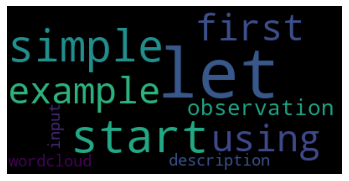

In [18]:
wordcloud = wc.WordCloud().generate(string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> As we can see the string favours `let`

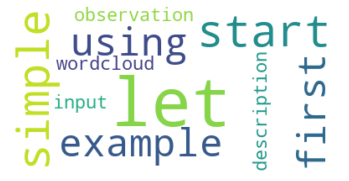

In [25]:
wordcloud = wc.WordCloud( max_words=100, background_color="white").generate(string)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Saving a wordcloud image

In [24]:
wordcloud.to_file('demo.png')
print("Saved")

Saved


### Putting the words in a containner

> In order to create a shape for your wordcloud, first, you need to find a PNG file to become the mask. 

In [26]:
from PIL import Image

In [27]:
wine_mask = np.array(Image.open('wine.png'))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

> The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). 

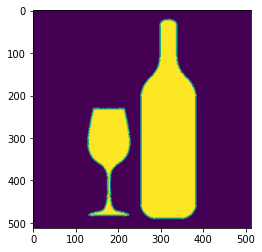

In [30]:
plt.imshow(wine_mask, interpolation="bilinear")

> Create a function that changes the image pixels, from black to white

In [34]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

> Change the image datatype to integer

In [35]:
wine_mask =wine_mask.astype(np.int32)
wine_mask.dtype

dtype('int32')

In [36]:
len(wine_mask)

512

In [37]:
for i in range(len(wine_mask)):
    wine_mask[i] = list(map(transform_format, wine_mask[i]))

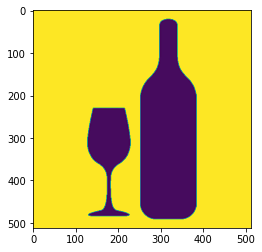

In [38]:
plt.imshow(wine_mask, interpolation="bilinear")

In [43]:
image = wc.WordCloud(background_color="white", max_words=1000, mask=wine_mask,
                contour_width=3, contour_color='firebrick').generate(string)

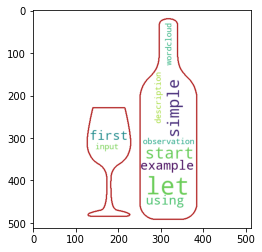

In [45]:
plt.imshow(image)
plt.show()

### Credits
> [Datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python)